In [ ]:
#PROJETO DE CIÊNCIA DE DADOS- PREVISÃO DE VENDAS
#PASSO A PASSO 
# 1º ENTENDIMENTODO DESAFIO
# 2º ENTENDIMENTO DA ÁREA /EMPRESA
# 3º EXTRAÇÃO/OBTENÇÃO DE DADOS 
# 4º AJUSTE DE DADOS 
# 5º ANÁLISE EXPLORATÓRIA
# 6º MODELAGEM + ALGORITMOS 
# 7º INTERPRETAÇÃO DE RESULTADOS


In [13]:
# importar a base de dados 
import pandas as pd
tabela = pd.read_csv("advertising.csv") 
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [14]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [15]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

#matplotib->gráficos
#seaborn->gráficos 
#scikit-learn->inteligência artificial
#plotly->gráficos 

In [16]:
display(tabela.corr())  

#Correlação negativa e positiva, no caso do desafio ela é apenas positiva.Segue a lógica do diretamente ou inversamente proporcional.
# o Número mais próximo de 1 significa que é o produto mais relacionado com as vendas.

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


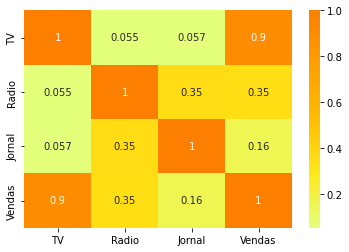

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
display(tabela.corr())

#criar o gráfico
sns.heatmap(tabela.corr(),cmap="Wistia", annot=True)
#exibir o gráfico
plt.show()


In [26]:
# PREPARAR A BASE DE DADOS - INTELIGÊNCIA ARTIFICIAL, consegue trabalhar com números e textos.
# com isso, podemos partir para a preparação de dados para treinamento o modelo machine learning
# x-> é o resto todo( quem você vai usar para fazer a previsão)
# y-> quem você vai prever -Vendas
#lista = 
x = tabela[["TV", "Radio", "Jornal"]]
y = tabela["Vendas"]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)


In [ ]:
# Regressão Linear 
# RandomForest -> árvore de decisão 


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#cria inteligência artidicial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treina a inteligência artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [29]:
# Fazer previsão de testes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

#para melhorar o modelo, deve ser verificado os valores do treino


0.9071151423684273
0.9665203695553085


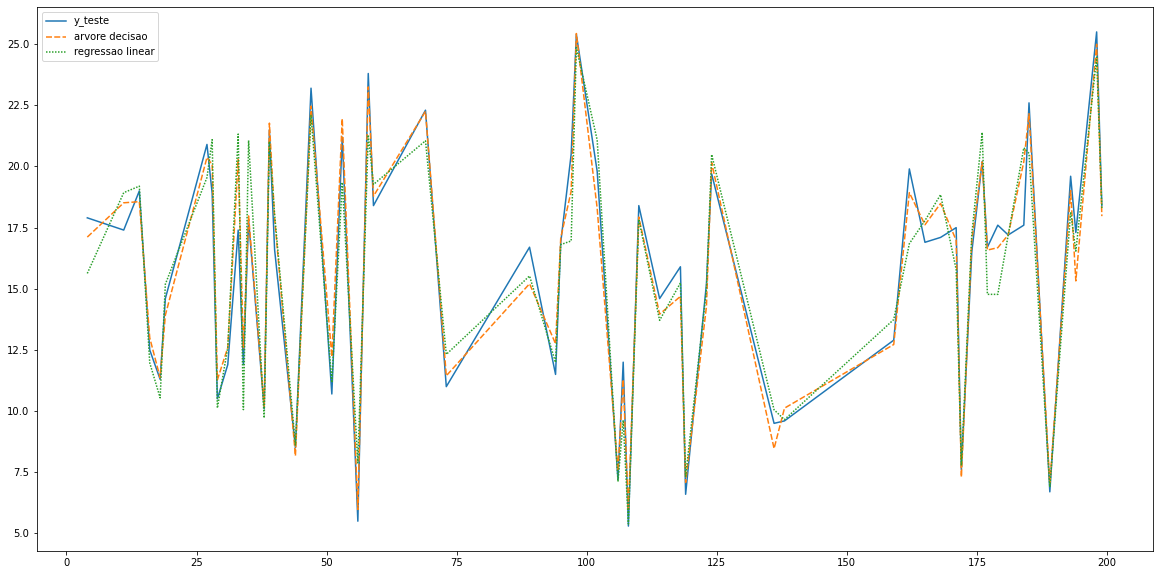

In [33]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["arvore decisao"] = previsao_arvoredecisao
tabela_auxiliar["regressao linear"] = previsao_regressaolinear

plt.figure(figsize=(20,10))

sns.lineplot(data=tabela_auxiliar)
plt.show()

In [34]:
# O melhor modelo é a árvore de decisão 
# O que o modelo precisa para fazer previsão?

novos = pd.read_csv("novos.csv")
display(novos)


,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [36]:
print(modelo_arvoredecisao.predict(novos))   # valores previstos abaixo de venda
# Previsão de vendas

[ 7.596  8.671 20.156]
